کد مربوطه به مقاله ارسالی  با عنوان:

### ترکیب روش منظم‌سازی تُنُک و آسیب مغزی بهینه‌ در کوچک‌سازی یک مدل یادگیری عمیق برای شناسایی کووید۱۹

به لحاظ ماهیت تصادفی مقداردهی اولیه‌ی وزنهای شبکه‌های عصبی، روال آموزش شبکه و سرور تخصیص یافته، اختلافاتی در اجراهای مختلف وجود دارد.

# Pruning deep neural networks to make them fast and small
## Train a VGG16 model for COVID19 detection, compress the model with pruning the model using Optimal Brain Damage (OBD) method

M. Amintoosi, m.amintoosi at gmail.com

In [1]:
import torch
torch.manual_seed(1)
import random
random.seed(1)

In [2]:
!git clone https://github.com/mamintoosi/Reg-OBD-for-VGG-Pruning-COVID19

Cloning into 'OBD-for-VGG-Pruning-COVID19'...
remote: Enumerating objects: 105, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 3749 (delta 63), reused 71 (delta 30), pack-reused 3644
Receiving objects: 100% (3749/3749), 295.68 MiB | 35.30 MiB/s, done.
Resolving deltas: 100% (118/118), done.
Checking out files: 100% (3536/3536), done.


In [ ]:
%cd Reg-OBD-for-VGG-Pruning-COVID19

In [ ]:
%%time
torch.manual_seed(1)
random.seed(1)
# Download a pre-trained VGG16 model and train it
# Transfer Learning: Train the VGG16 model
%run finetune_SpReg.py --train --use-cuda --train_epoch 25 --ds_name 'COVID-Radiography' \
  --train_path 'data/COVID-Radiography/train' --test_path 'data/COVID-Radiography/val' \
  --output_model 'vgg_covid' 

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth



Using CUDA...
Epoch:  1 / 25
Accuracy : 0.78
Epoch:  2 / 25
Accuracy : 0.74
Epoch:  3 / 25
Accuracy : 0.785
Epoch:  4 / 25
Accuracy : 0.785
Epoch:  5 / 25
Accuracy : 0.745
Epoch:  6 / 25
Accuracy : 0.815
Epoch:  7 / 25
Accuracy : 0.725
Epoch:  8 / 25
Accuracy : 0.655
Epoch:  9 / 25
Accuracy : 0.8
Epoch:  10 / 25
Accuracy : 0.835
Epoch:  11 / 25
Accuracy : 0.74
Epoch:  12 / 25
Accuracy : 0.785
Epoch:  13 / 25
Accuracy : 0.83
Epoch:  14 / 25
Accuracy : 0.74
Epoch:  15 / 25
Accuracy : 0.785
Epoch:  16 / 25
Accuracy : 0.745
Epoch:  17 / 25
Accuracy : 0.855
Epoch:  18 / 25
Accuracy : 0.78
Epoch:  19 / 25
Accuracy : 0.8
Epoch:  20 / 25
Accuracy : 0.855
Epoch:  21 / 25
Accuracy : 0.705
Epoch:  22 / 25
Accuracy : 0.78
Epoch:  23 / 25
Accuracy : 0.85
Epoch:  24 / 25
Accuracy : 0.795
Epoch:  25 / 25
Accuracy : 0.85
Finished fine tuning.
CPU times: user 2min 23s, sys: 2min 3s, total: 4min 26s
Wall time: 6min 16s


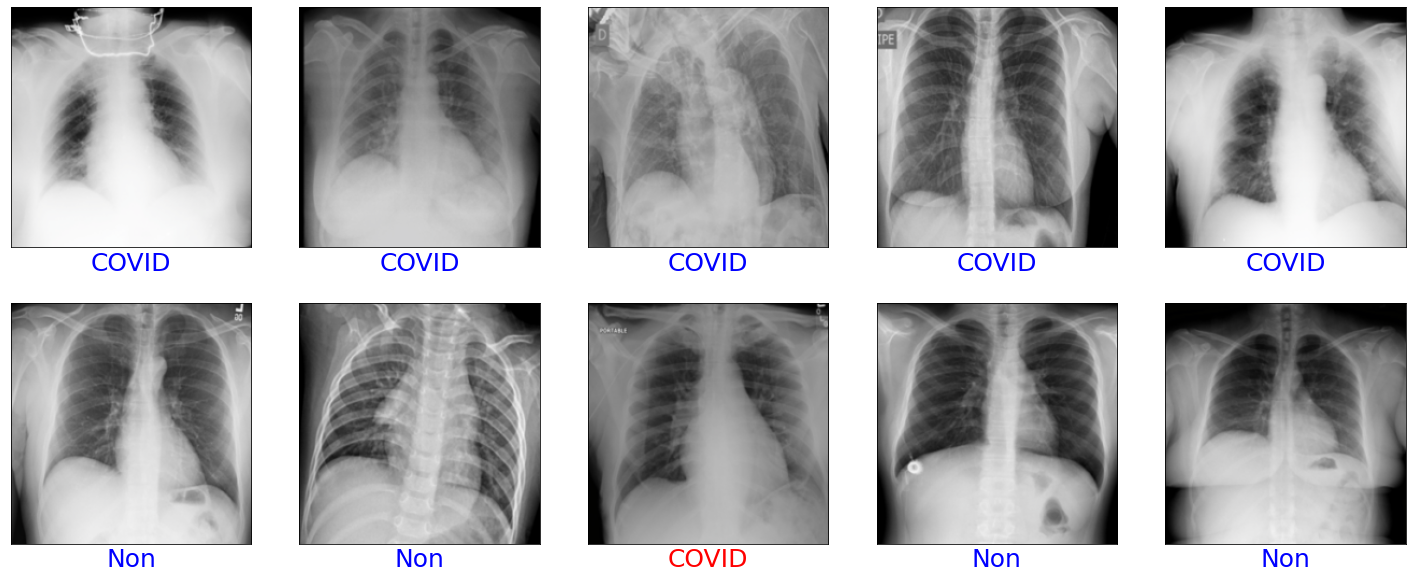

Accuracy : 0.83
CPU times: user 1min 31s, sys: 2.21 s, total: 1min 33s
Wall time: 1min 40s


In [ ]:
%%time
# Test the transfer learning model
%run finetune_SpReg.py --test --ds_name 'COVID-Radiography' \
  --train_path 'data/COVID-Radiography/train' --test_path 'data/COVID-Radiography/test'\
  --input_model 'vgg_covid'

In [ ]:
%%time
torch.manual_seed(1)
random.seed(1)
# Pruning the trained model using HSQGL12 method
%run finetune_SpReg.py --prune --use-cuda --train_epoch 30 --reg_name 'HSQGL12' --ds_name 'COVID-Radiography' \
  --train_path 'data/COVID-Radiography/train' --test_path 'data/COVID-Radiography/val'\
  --input_model 'vgg_covid' --output_model 'vgg_HSQGL12'

Using CUDA...
Using Regularization:  HSQGL12
Accuracy : 0.85
Retraining with regularization ... 
Epoch:  1 / 30
Accuracy : 0.625
Epoch:  2 / 30
Accuracy : 0.825
Epoch:  3 / 30
Accuracy : 0.665
Epoch:  4 / 30
Accuracy : 0.705
Epoch:  5 / 30
Accuracy : 0.82
Epoch:  6 / 30
Accuracy : 0.74
Epoch:  7 / 30
Accuracy : 0.82
Epoch:  8 / 30
Accuracy : 0.79
Epoch:  9 / 30
Accuracy : 0.74
Epoch:  10 / 30
Accuracy : 0.845
Epoch:  11 / 30
Accuracy : 0.85
Epoch:  12 / 30
Accuracy : 0.835
Epoch:  13 / 30
Accuracy : 0.665
Epoch:  14 / 30
Accuracy : 0.895
Epoch:  15 / 30
Accuracy : 0.785
Epoch:  16 / 30
Accuracy : 0.865
Epoch:  17 / 30
Accuracy : 0.875
Epoch:  18 / 30
Accuracy : 0.775
Epoch:  19 / 30
Accuracy : 0.8
Epoch:  20 / 30
Accuracy : 0.855
Epoch:  21 / 30
Accuracy : 0.82
Epoch:  22 / 30
Accuracy : 0.85
Epoch:  23 / 30
Accuracy : 0.82
Epoch:  24 / 30
Accuracy : 0.59
Epoch:  25 / 30
Accuracy : 0.66
Epoch:  26 / 30
Accuracy : 0.805
Epoch:  27 / 30
Accuracy : 0.645
Epoch:  28 / 30
Accuracy : 0.865
E

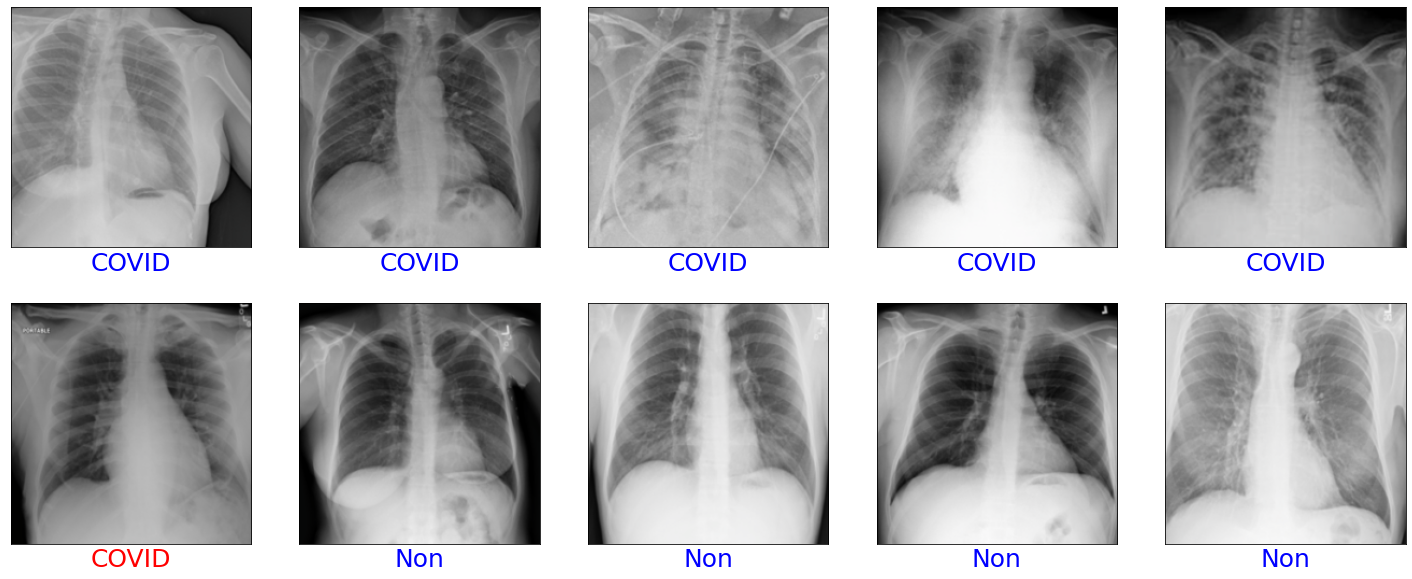

Accuracy : 0.83
CPU times: user 1min 30s, sys: 854 ms, total: 1min 31s
Wall time: 1min 31s


In [ ]:
%%time
# Test the model with regularization
%run finetune_SpReg.py --test --ds_name 'COVID-Radiography' \
  --train_path 'data/COVID-Radiography/train' --test_path 'data/COVID-Radiography/test'\
  --input_model 'vgg_HSQGL12'

In [ ]:
# Pruning the trained model
%%time
torch.manual_seed(1)
random.seed(1)
# Pruning the trained model using OBD method
%run finetune_SpReg.py --prune --use-cuda --ds_name 'COVID-Radiography' \
  --train_path 'data/COVID-Radiography/train' --test_path 'data/COVID-Radiography/val'\
  --input_model 'vgg_covid' --output_model 'vgg_OBD'

Using CUDA...
Accuracy : 0.85
4224 512 8
5
Number of prunning iterations to reduce 70% filters 5
Iter:  1 / 5
Ranking filters.. 
Layers that will be prunned {17: 68, 21: 72, 26: 70, 10: 30, 0: 6, 14: 28, 28: 63, 19: 62, 12: 23, 24: 65, 7: 10, 2: 9, 5: 6}
Prunning filters.. 
Filters prunned 12.121212121212125%
Accuracy : 0.625
Fine tuning to recover from prunning iteration.
Epoch:  1 / 5
Accuracy : 0.845
Epoch:  2 / 5
Accuracy : 0.85
Epoch:  3 / 5
Accuracy : 0.835
Epoch:  4 / 5
Accuracy : 0.79
Epoch:  5 / 5
Accuracy : 0.86
Finished fine tuning.
Iter:  2 / 5
Ranking filters.. 
Layers that will be prunned {28: 86, 17: 70, 5: 12, 19: 56, 24: 73, 21: 52, 2: 6, 26: 69, 12: 27, 0: 7, 14: 24, 10: 20, 7: 10}
Prunning filters.. 
Filters prunned 24.24242424242425%
Accuracy : 0.85
Fine tuning to recover from prunning iteration.
Epoch:  1 / 5
Accuracy : 0.85
Epoch:  2 / 5
Accuracy : 0.795
Epoch:  3 / 5
Accuracy : 0.835
Epoch:  4 / 5
Accuracy : 0.865
Epoch:  5 / 5
Accuracy : 0.855
Finished fine tuni

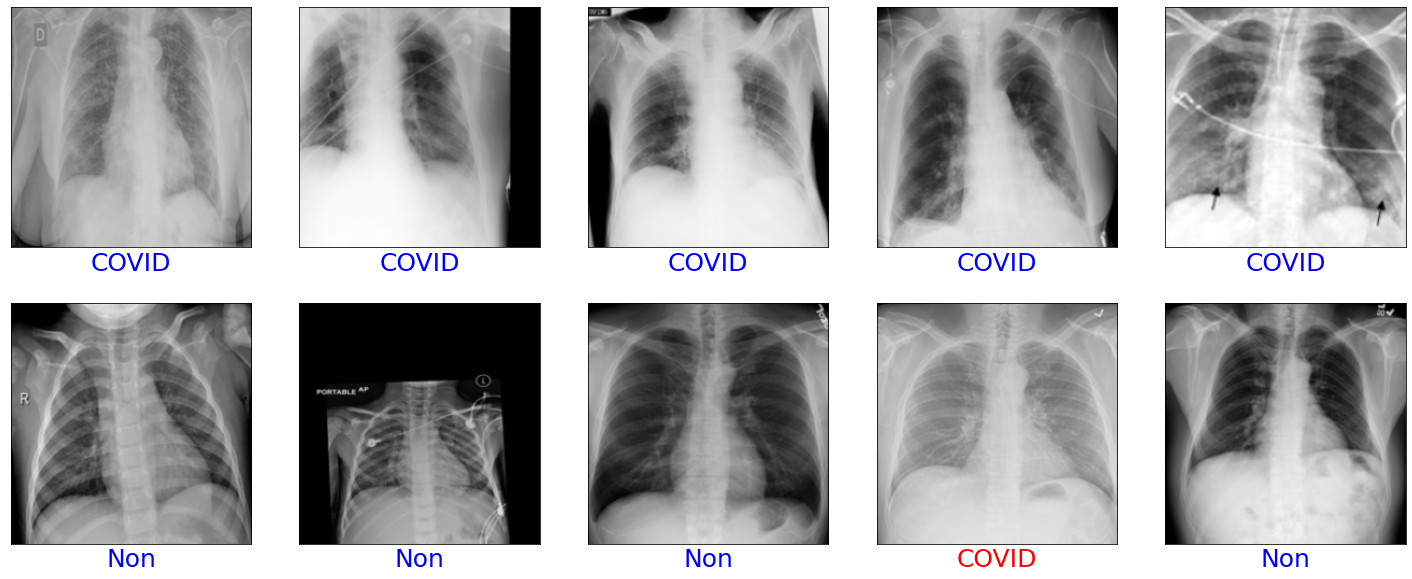

Accuracy : 0.725
CPU times: user 30.6 s, sys: 243 ms, total: 30.8 s
Wall time: 30.7 s


In [ ]:
%%time
# Test the pruned model
%run finetune_SpReg.py --test --ds_name 'COVID-Radiography' \
  --train_path 'data/COVID-Radiography/train' --test_path 'data/COVID-Radiography/test'\
  --input_model 'vgg_OBD'

In [ ]:
%%time
torch.manual_seed(1)
random.seed(1)
# Pruning the HSQGL12 method using OBD method
%run finetune_SpReg.py --prune --use-cuda --ds_name 'COVID-Radiography' \
  --train_path 'data/COVID-Radiography/train' --test_path 'data/COVID-Radiography/val'\
  --input_model 'vgg_HSQGL12' --output_model 'vgg_HSQGL12_OBD'

Using CUDA...
Accuracy : 0.865
4224 512 8
5
Number of prunning iterations to reduce 70% filters 5
Iter:  1 / 5
Ranking filters.. 
Layers that will be prunned {28: 289, 26: 73, 17: 33, 21: 46, 14: 9, 24: 15, 12: 8, 19: 27, 10: 3, 2: 3, 7: 2, 0: 3, 5: 1}
Prunning filters.. 
Filters prunned 12.121212121212125%
Accuracy : 0.84
Fine tuning to recover from prunning iteration.
Epoch:  1 / 5
Accuracy : 0.795
Epoch:  2 / 5
Accuracy : 0.82
Epoch:  3 / 5
Accuracy : 0.835
Epoch:  4 / 5
Accuracy : 0.855
Epoch:  5 / 5
Accuracy : 0.86
Finished fine tuning.
Iter:  2 / 5
Ranking filters.. 
Layers that will be prunned {19: 69, 21: 102, 12: 26, 7: 8, 24: 57, 28: 70, 26: 87, 17: 45, 14: 24, 10: 15, 2: 4, 0: 1, 5: 4}
Prunning filters.. 
Filters prunned 24.24242424242425%
Accuracy : 0.87
Fine tuning to recover from prunning iteration.
Epoch:  1 / 5
Accuracy : 0.795
Epoch:  2 / 5
Accuracy : 0.795
Epoch:  3 / 5
Accuracy : 0.885
Epoch:  4 / 5
Accuracy : 0.87
Epoch:  5 / 5
Accuracy : 0.875
Finished fine tuning.

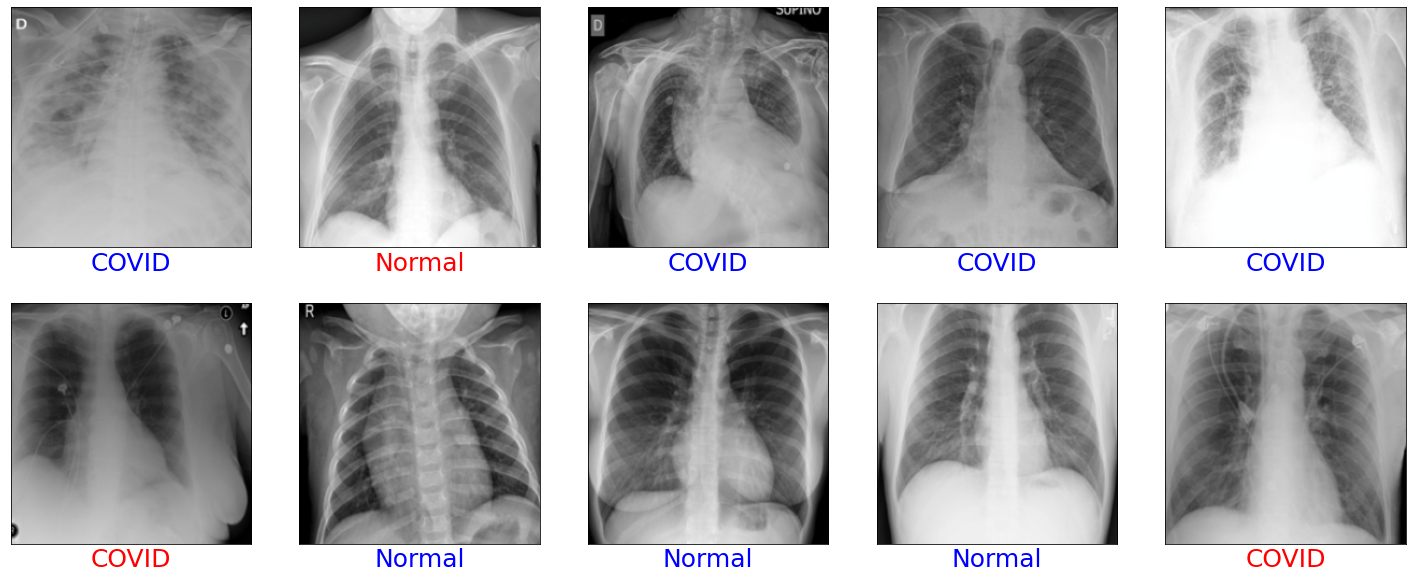

Accuracy : 0.83
CPU times: user 33.2 s, sys: 337 ms, total: 33.5 s
Wall time: 33.4 s


In [17]:
%%time
# Test the model with proposed method: HSQGL12 + OBD'
%run finetune_SpReg.py --test --ds_name 'COVID-Radiography' \
  --train_path 'data/COVID-Radiography/train' --test_path 'data/COVID-Radiography/test'\
  --input_model 'vgg_HSQGL12_OBD'

In [14]:
!ls -s models

total 1343060
     0 for_models.txt  124384 vgg_HSQGL12_OBD.pt  169652 vgg_OBD.pt
524512 vgg_covid.pt    524512 vgg_HSQGL12.pt


In [8]:
# # Print the model
args.models_dir = 'models/'
input_model = 'vgg_HSQGL12_OBD' # 'vgg_OBD' #'vgg_HSQGL12'  #'vgg_covid'
model_file_name = '{}{}.pt'.format(args.models_dir, input_model)
model = torch.load(model_file_name, map_location=lambda storage, loc: storage)
model = model.cuda()
from torchsummary import summary
summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 36, 224, 224]           1,008
              ReLU-2         [-1, 36, 224, 224]               0
            Conv2d-3         [-1, 36, 224, 224]          11,700
              ReLU-4         [-1, 36, 224, 224]               0
         MaxPool2d-5         [-1, 36, 112, 112]               0
            Conv2d-6         [-1, 90, 112, 112]          29,250
              ReLU-7         [-1, 90, 112, 112]               0
            Conv2d-8         [-1, 78, 112, 112]          63,258
              ReLU-9         [-1, 78, 112, 112]               0
        MaxPool2d-10           [-1, 78, 56, 56]               0
           Conv2d-11          [-1, 166, 56, 56]         116,698
             ReLU-12          [-1, 166, 56, 56]               0
           Conv2d-13          [-1, 128, 56, 56]         191,360
             ReLU-14          [-1, 128,